In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import numpy as np
import numpy as np
import scipy as sp
import scipy.stats
%matplotlib inline
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('NN1-loss.csv')
df.head()

,Unnamed: 0,algo1-1,algo1-2,algo1-3,algo2-1,algo2-2,algo2-3,algo3-1,algo3-2,algo3-3,...,algo10-3,algo11-1,algo11-2,algo11-3,algo12-1,algo12-2,algo12-3,algo13-1,algo13-2,algo13-3
0,25000,1230141,1213841,1194814,1390433,1293014,1313910,992304,983273,1002389,...,999212,1023910,1092839,991239,1230341,1133042,1023894,1239014,1239041,1293104
1,50000,1123944,1102393,1028491,1223081,1149024,1212398,912389,893718,932718,...,865718,901239,921318,892317,1039478,981941,973213,1038194,1012394,1198394
2,75000,990193,1002389,981390,1012384,1002304,1093104,857813,849013,862839,...,800121,821920,859103,812391,993124,963184,937184,972318,923040,1023894
3,100000,897382,901237,871248,948129,957813,1000238,812393,791237,801238,...,712301,791201,762301,753129,941627,938139,892378,892130,839104,992389
4,125000,781293,781230,792138,873219,839120,902389,761031,758139,748193,...,639121,701329,733891,693178,882913,891234,862389,812390,781239,910293


In [34]:
def plot_interval(data):
    _mean = []
    _max = []
    _min = []
    for row in data:
        _mean.append(np.mean(row))
        _min.append(np.min(row))
        _max.append(np.max(row))
    return np.array(_mean) / 1500000, np.array(_max) / 1500000, np.array(_min) / 1500000

In [35]:
_mean, _max, _min = plot_interval(np.array(df.iloc[:,1:4]))

In [36]:
def plot_mean_and_CI(_mean, _max, _min, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(0, 500000, 25000), _max, _min,
                     color=color_shading, alpha=.1)
    # plot the mean on top
    plt.plot(range(0, 500000, 25000), _mean, color =color_mean)

In [39]:
def plot_two(means, maxes, mins, names):
    # plot the data
    fig = plt.figure(1, figsize=(10, 7))
    plt.grid(color='gray', linestyle='--', linewidth=1)
    
    colors = ['r', 'black', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'olive', 'cyan']
    for i in range(means.shape[0]):
        plot_mean_and_CI(means[i], maxes[i], mins[i], color_mean=colors[i], color_shading=colors[i])

    plt.xlabel('Number of episodes')
    plt.ylabel('Loss value')


    bg = np.array([1, 1, 1])  # background of the legend is white
    
    #plt.xlim((0, 500000))  
    # with alpha = .5, the faded color is the average of the background and color
    colors_faded = [(np.array(cc.to_rgb(color)) + bg) / 2.0 for color in colors]
    font = {'family' : 'normal',
            'size'   : 14}

    plt.rc('font', **font) 
    plt.legend(names, loc = 'upper right')

# Compare different configuration for NN1, one graph per team

In [40]:
df.columns

Index(['Unnamed: 0', 'algo1-1', 'algo1-2', 'algo1-3', 'algo2-1', 'algo2-2',
       'algo2-3', 'algo3-1', 'algo3-2', 'algo3-3', 'algo4-1', 'algo4-2',
       'algo4-3', 'algo5-1', 'algo5-2', 'algo5-3', 'algo6-1', 'algo6-2',
       'algo6-3', 'algo7-1', 'algo7-2', 'algo7-3', 'algo8-1', 'algo8-2',
       'algo8-3', 'algo9-1', 'algo9-2', 'algo9-3', 'algo10-1', 'algo10-2',
       'algo10-3', 'algo11-1', 'algo11-2', 'algo11-3', 'algo12-1', 'algo12-2',
       'algo12-3', 'algo13-1', 'algo13-2', 'algo13-3'],
      dtype='object')

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


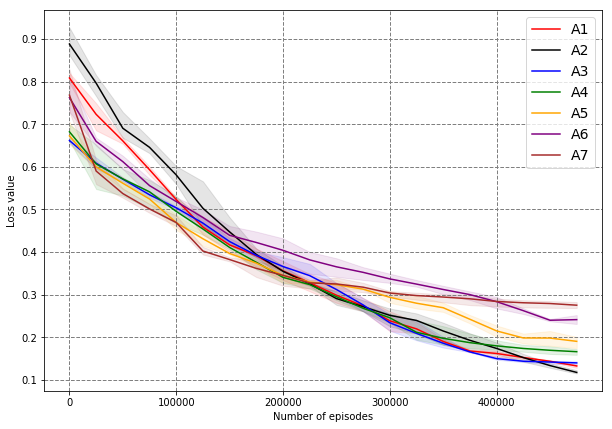

In [41]:
# generate 3 sets of random means and confidence intervals to plot
mean0, max0, min0 = plot_interval(np.array(df.iloc[:,1:4]))
mean1, max1, min1  = plot_interval(np.array(df.iloc[:,4:7]))
mean2, max2, min2  = plot_interval(np.array(df.iloc[:,7:10]))
mean3, max3, min3  = plot_interval(np.array(df.iloc[:,10:13]))
mean4, max4, min4  = plot_interval(np.array(df.iloc[:,13:16]))
mean5, max5, min5  = plot_interval(np.array(df.iloc[:,16:19]))
mean6, max6, min6  = plot_interval(np.array(df.iloc[:,19:22]))


means = np.array([mean0, mean1, mean2, mean3, mean4, mean5, mean6])
maxes = np.array([max0, max1, max2, max3, max4, max5, max6]) 
mins = np.array([min0, min1, min2, min3, min4, min5, min6])
    
names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7']
plot_two(means, maxes, mins, names)
plt.savefig('./nn1-per-team')

# Compare NN1 per team: self-attention (1-10) and nn (22-31)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


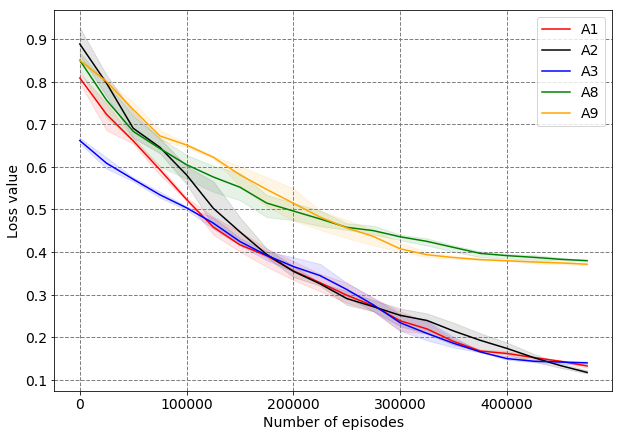

In [42]:
# generate 3 sets of random means and confidence intervals to plot
mean0, max0, min0 = plot_interval(np.array(df.iloc[:,1:4]))
mean1, max1, min1  = plot_interval(np.array(df.iloc[:,4:7]))
mean2, max2, min2  = plot_interval(np.array(df.iloc[:,7:10]))
mean3, max3, min3  = plot_interval(np.array(df.iloc[:,22:25]))
mean4, max4, min4  = plot_interval(np.array(df.iloc[:,25:28]))

means = np.array([mean0, mean1, mean2, mean3, mean4])
maxes = np.array([max0, max1, max2, max3, max4]) 
mins = np.array([min0, min1, min2, min3, min4])
    
names = ['A1', 'A2', 'A3', 'A8', 'A9']
plot_two(means, maxes, mins, names)
plt.savefig('./nn1-per-team-selfattn')

# Compare NN1 per team: self-attention (28-38) and nn (39-42)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


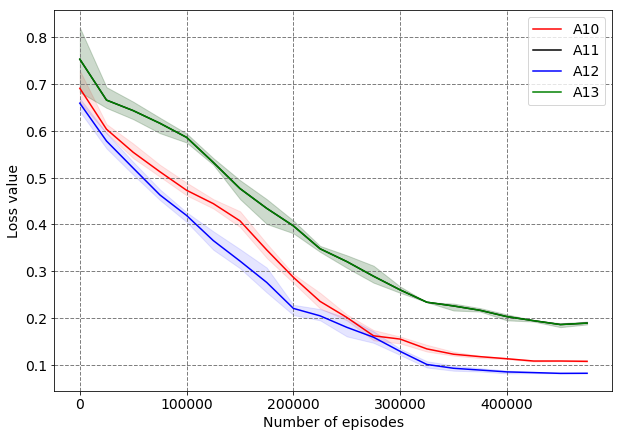

In [43]:
# generate 3 sets of random means and confidence intervals to plot
mean0, max0, min0 = plot_interval(np.array(df.iloc[:,31:34]))
mean1, max1, min1  = plot_interval(np.array(df.iloc[:,34:37]))
mean2, max2, min2  = plot_interval(np.array(df.iloc[:,28:31]))
mean3, max3, min3  = plot_interval(np.array(df.iloc[:,34:37]))


means = np.array([mean0, mean1, mean2, mean3])
maxes = np.array([max0, max1, max2, max3]) 
mins = np.array([min0, min1, min2, min3])
    
names = ['A10', 'A11', 'A12', 'A13']
plot_two(means, maxes, mins, names)
plt.savefig('./nn1-per-team-agent-s-a')

# Compare NN1 between per team and per agent

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


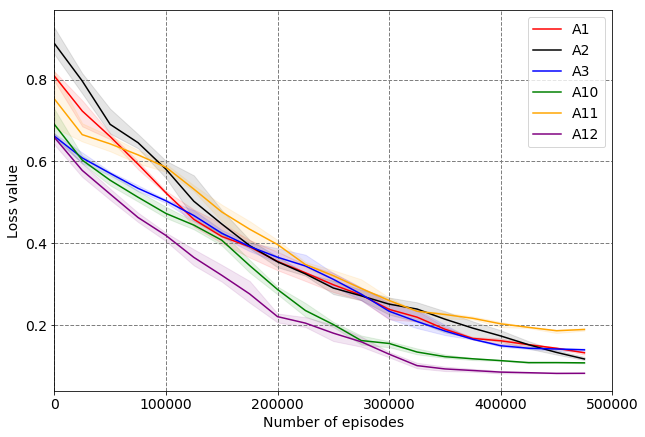

In [31]:
# generate 3 sets of random means and confidence intervals to plot
mean0, max0, min0 = plot_interval(np.array(df.iloc[:,1:4]))
mean1, max1, min1  = plot_interval(np.array(df.iloc[:,4:7]))
mean2, max2, min2  = plot_interval(np.array(df.iloc[:,7:10]))
mean3, max3, min3  = plot_interval(np.array(df.iloc[:,31:34]))
mean4, max4, min4  = plot_interval(np.array(df.iloc[:,34:37]))
mean5, max5, min5  = plot_interval(np.array(df.iloc[:,28:31]))


means = np.array([mean0, mean1, mean2, mean3, mean4, mean5])
maxes = np.array([max0, max1, max2, max3, max4, max5]) 
mins = np.array([min0, min1, min2, min3, min4, min5])
    
names = ['A1', 'A2', 'A3', 'A10', 'A11', 'A12']
plot_two(means, maxes, mins, names)
plt.savefig('./nn1-per-team-agent')

# Draw graph
##### Graph drawing

In [145]:
def create_color_map(ind, G):
    color_map = []
    for i, node in enumerate(G):
        if node[:1] == 'a': # agent
            if (i - ind*2 - 1)*(i - ind*2) == 0:
                color_map.append('purple')
            else:
                color_map.append('red')
        elif node[:1] == 'w': # wooden wall
            color_map.append('olive') 
        elif node[:1] == 'b': # bomb
            color_map.append('black') 
        elif node[:1] == 'i':  # increase blast power
            color_map.append('green')    
        elif node[:1] == 'e': # extra bomb 6 10
            color_map.append('yellow') 
        elif node[:1] == 'c': # can kick Power-Up 4 1
            color_map.append('blue') 
            #node_color = color_map
        print(color_map[-1], node)
    return color_map


In [146]:
def draw_graph(index_name, start_index, end_index):
    index = 0 if index_name - start_index == -1 else 1
    graph1_name = df.iloc[:,index_name]
    graph1_name = {index[0]: v for index, v in np.ndenumerate(graph1_name)}

    graph1_matrix_team1 = np.array(df.iloc[:,start_index:end_index])
    np.nan_to_num(graph1_matrix_team1, copy=False)
    graph1_matrix_team1 = -graph1_matrix_team1 + 100
    graph1_matrix_team1[np.where(graph1_matrix_team1.astype(int) == 100)] = 0

    c = np.zeros((graph1_matrix_team1.shape[0], graph1_matrix_team1.shape[0] - graph1_matrix_team1.shape[1]))
    graph1_matrix_team1 = np.concatenate([graph1_matrix_team1, c], axis = 1)

    G = nx.from_numpy_matrix(graph1_matrix_team1)
    G=nx.relabel_nodes(G, graph1_name)
    G.remove_nodes_from(list(nx.isolates(G)))
    color_map = create_color_map(index, G)
    #edges=nx.draw_networkx_edges(G,pos=nx.spring_layout(G), with_labels=True)
    #nx.draw(G, with_labels = True)
    nx.draw(G,pos=nx.spring_layout(G), with_labels = True, node_color = color_map)
    plt.draw()
    plt.show()

### per team

In [148]:
df = pd.read_csv('graph-team.csv')
df.head()

,Unnamed: 0,agent1,agent2,agent3,agent4,Unnamed: 5,Unnamed: 6,agent1.1,agent2.1,agent3.1,...,Unnamed: 23,Unnamed: 24,agent1.4,agent2.4,agent3.4,agent4.4,Unnamed: 29,Unnamed: 30,agent2.5,agent3.5
0,agent1,0.0,-29.0,89.0,19.0,NaN,agent1,0.0,-27.0,93.0,...,NaN,agent1,0.0,-29.0,76.0,18.0,NaN,agent2,0.0,30.0
1,agent2,-32.0,0.0,14.0,92.0,NaN,agent2,NaN,0.0,23.0,...,NaN,agent2,-32.0,0.0,19.0,96.0,NaN,agent3,12.0,0.0
2,agent3,19.0,92.0,0.0,-32.0,NaN,agent3,NaN,93.0,0.0,...,NaN,agent3,15.0,87.0,0.0,-59.0,NaN,wooden wall 3 4,NaN,17.0
3,agent4,87.0,18.0,-36.0,0.0,NaN,agent4,83.0,37.0,-32.0,...,NaN,agent4,98.0,24.0,-67.0,0.0,NaN,wooden wall 4 3,NaN,12.0
4,wooden wall 0 2,21.0,NaN,NaN,NaN,NaN,wooden wall 1 5,NaN,-12.0,NaN,...,NaN,wooden wall 2 4,-13.0,NaN,NaN,NaN,NaN,wooden wall 4 5,NaN,16.0


purple agent1
purple agent2
red agent3
red agent4
olive wooden wall 0 2
olive wooden wall 1 4
olive wooden wall 1 6
olive wooden wall 1 10
olive wooden wall 2 0
olive wooden wall 2 7
olive wooden wall 2 10
olive wooden wall 4 1
olive wooden wall 4 10
black bomb 1 2
black bomb 1 9


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


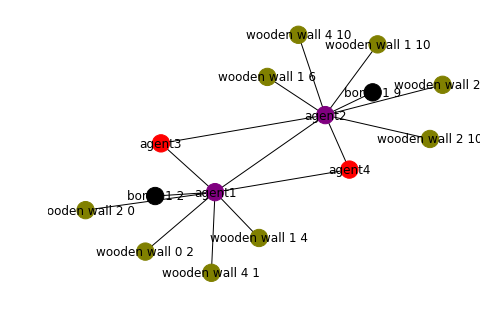

red agent1
red agent2
purple agent3
purple agent4
olive wooden wall 6 1
olive wooden wall 6 9
olive wooden wall 6 10
olive wooden wall 7 2
olive wooden wall 7 8
olive wooden wall 8 7
olive wooden wall 9 4
olive wooden wall 9 6
olive wooden wall 10 1
olive wooden wall 10 6
black bomb 9 1
black bomb 8 8


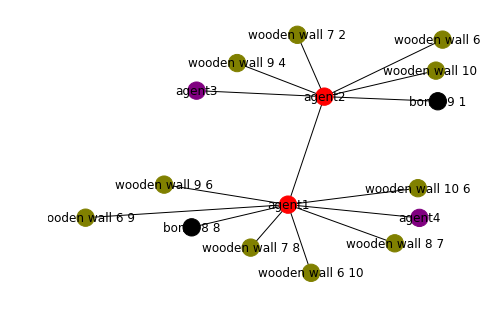

purple agent1
purple agent2
red agent3
red agent4
olive wooden wall 1 5
olive wooden wall 2 10
olive wooden wall 4 6
olive wooden wall 4 9
black bomb 2 9
black bomb 3 1
green increase blast power


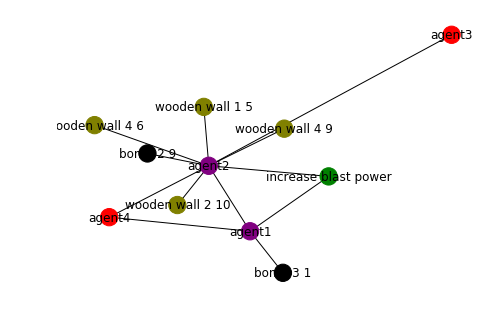

red agent1
red agent2
purple agent4
olive wooden wall 6 10
olive wooden wall 9 5
olive wooden wall 10 6
black bomb 6 9
black bomb 7 1
black bomb 9 3


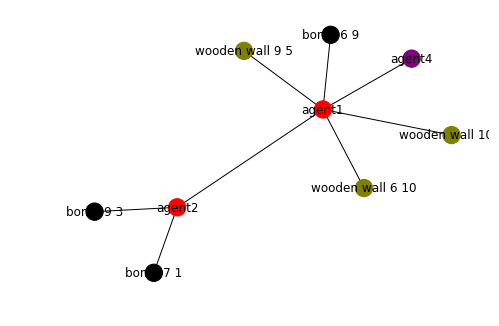

purple agent1
purple agent2
red agent3
red agent4
olive wooden wall 1 5
olive wooden wall 2 4
olive wooden wall 4 2
olive wooden wall 5 1
olive wooden wall 5 4
olive wooden wall 5 10
yellow extra bomb 6 1
yellow extra bomb 6 10
blue can kick Power-Up 4 1


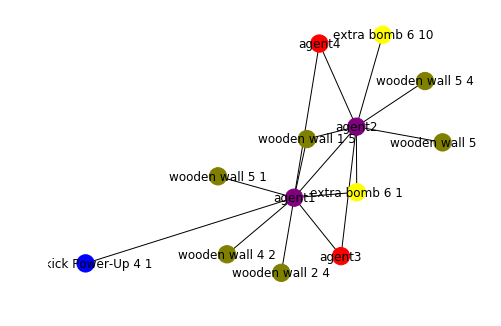

red agent1
red agent2
purple agent3
purple agent4
olive wooden wall 5 1
olive wooden wall 9 5
olive wooden wall 10 4
black bomb 9 6
yellow extra bomb 5 9
yellow extra bomb 6 1
yellow extra bomb 6 10


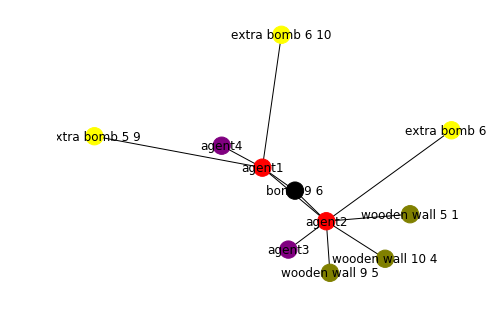

purple agent1
purple agent2
red agent3
red agent4
olive wooden wall 1 5
olive wooden wall 2 4
olive wooden wall 4 2
olive wooden wall 5 1
olive wooden wall 5 10
black bomb 1 6
black bomb 5 9
black bomb 6 10
blue can kick Power-Up 4 1
blue can kick Power-Up 4 9


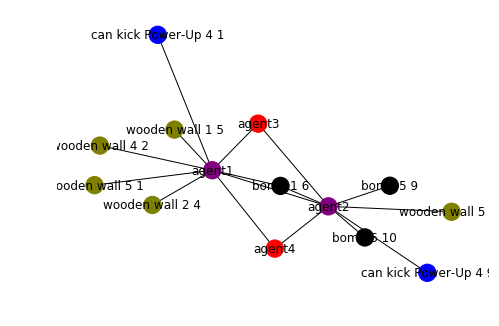

red agent1
red agent2
purple agent3
olive wooden wall 4 6
olive wooden wall 5 10
olive wooden wall 6 4
olive wooden wall 10 5
black bomb 1 6
black bomb 5 9
black bomb 6 10
yellow extra bomb 10 6
blue can kick Power-Up 4 9
blue can kick Power-Up 9 4


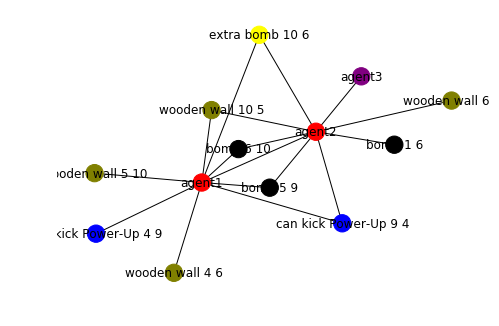

purple agent1
purple agent2
red agent3
red agent4
olive wooden wall 2 4
olive wooden wall 4 2
olive wooden wall 4 6
olive wooden wall 4 10
black bomb 1 4
black bomb 10 6
yellow extra bomb 5 1
blue can kick Power-Up 4 1
blue can kick Power-Up 10 4


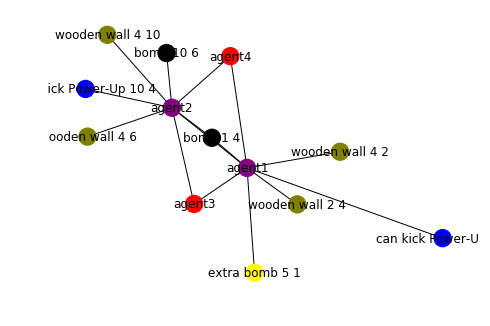

red agent1
red agent2
purple agent3
purple agent4
olive wooden wall 4 2
olive wooden wall 4 3
olive wooden wall 5 4
olive wooden wall 6 4
olive wooden wall 10 5
black bomb 1 4
black bomb 10 6
yellow extra bomb 5 1
blue can kick Power-Up 4 1
blue can kick Power-Up 10 4


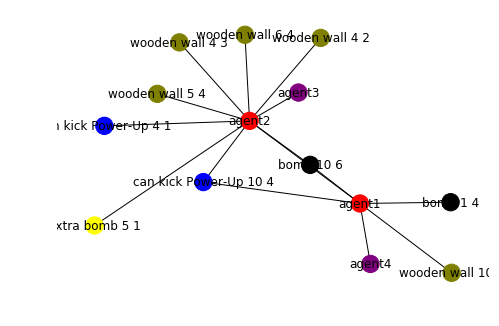

In [149]:
draw_graph(0, 1, 3) # first game first team
draw_graph(0, 3, 5) # first game second team
draw_graph(6, 7, 9) # second game first team
draw_graph(6, 9, 11) # second game second team
draw_graph(12, 13, 15) # third game first team
draw_graph(12, 15, 17) # third game second team
draw_graph(18, 19, 21) # 4 game second team
draw_graph(18, 21, 23) # 4 game second team
draw_graph(24, 25, 27) # 5 game second team
draw_graph(24, 27, 29) # 5 game second team

### per agent

In [134]:
df = pd.read_csv('graph-agent.csv')
df.head()

,Unnamed: 0,agent1,agent2,agent3,agent4,Unnamed: 5,Unnamed: 6,agent1.1,agent2.1,agent3.1,...,Unnamed: 23,Unnamed: 24,agent1.4,agent2.4,agent3.4,agent4.4,Unnamed: 29,Unnamed: 30,agent2.5,agent3.5
0,agent1,0.0,-29.0,46.0,76.0,NaN,agent1,0.0,-16.0,34.0,...,NaN,agent1,0.0,-31.0,56.0,87.0,NaN,agent2,0.0,18.0
1,agent2,-21.0,0.0,78.0,48.0,NaN,agent2,-13.0,0.0,37.0,...,NaN,agent2,-23.0,0.0,89.0,67.0,NaN,agent3,17.0,0.0
2,agent3,49.0,67.0,0.0,-31.0,NaN,agent3,34.0,34.0,0.0,...,NaN,agent3,46.0,89.0,0.0,-21.0,NaN,wooden wall 3 4,NaN,18.0
3,agent4,63.0,47.0,-25.0,0.0,NaN,agent4,45.0,24.0,-45.0,...,NaN,agent4,67.0,36.0,-29.0,0.0,NaN,wooden wall 4 3,NaN,14.0
4,wooden wall 0 2,23.0,NaN,NaN,NaN,NaN,wooden wall 1 5,24.0,35.0,NaN,...,NaN,wooden wall 2 4,18.0,NaN,NaN,NaN,NaN,wooden wall 4 5,NaN,17.0


purple agent1
purple agent2
red agent3
red agent4
olive wooden wall 0 2
olive wooden wall 1 4
olive wooden wall 1 6
olive wooden wall 1 10
olive wooden wall 2 0
olive wooden wall 2 7
olive wooden wall 2 10
olive wooden wall 4 1
olive wooden wall 4 10
black bomb 1 2
black bomb 1 9


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


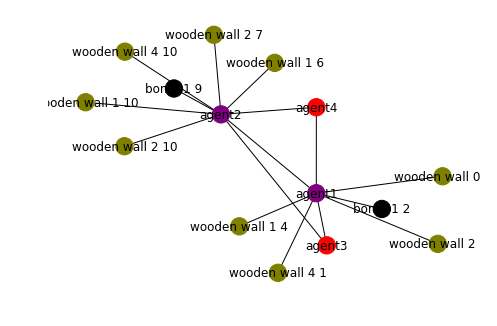

red agent1
red agent2
purple agent3
purple agent4
olive wooden wall 6 1
olive wooden wall 6 9
olive wooden wall 6 10
olive wooden wall 7 2
olive wooden wall 7 8
olive wooden wall 8 7
olive wooden wall 9 4
olive wooden wall 9 6
olive wooden wall 10 1
olive wooden wall 10 6
black bomb 9 1
black bomb 8 8


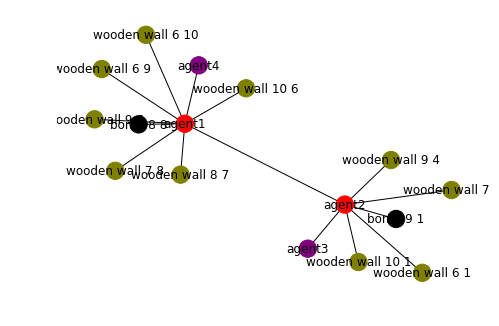

purple agent1
purple agent2
red agent3
red agent4
olive wooden wall 1 5
olive wooden wall 2 10
olive wooden wall 4 6
olive wooden wall 4 9
black bomb 2 9
black bomb 3 1
green increase blast power


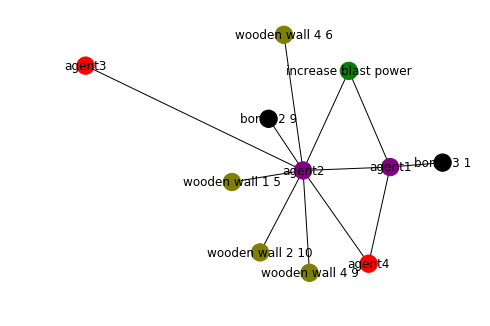

red agent1
red agent2
purple agent4
olive wooden wall 6 10
olive wooden wall 9 5
olive wooden wall 10 6
black bomb 6 9
black bomb 7 1
black bomb 9 3


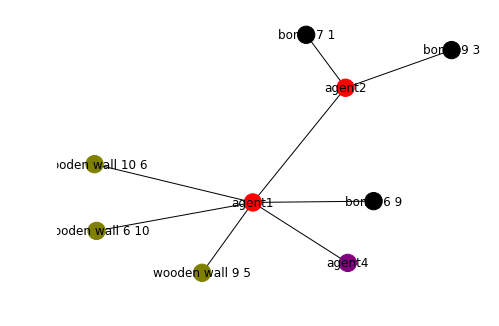

purple agent1
purple agent2
red agent3
red agent4
olive wooden wall 1 5
olive wooden wall 2 4
olive wooden wall 4 2
olive wooden wall 5 1
olive wooden wall 5 4
olive wooden wall 5 10
yellow extra bomb 6 1
yellow extra bomb 6 10
blue can kick Power-Up 4 1


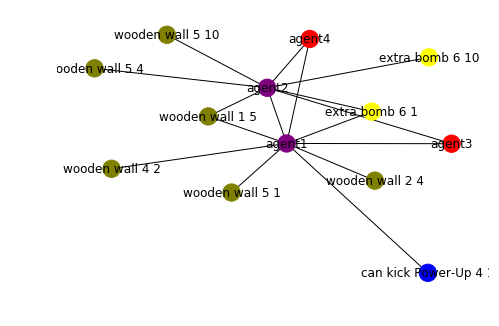

red agent1
red agent2
purple agent3
purple agent4
olive wooden wall 5 1
olive wooden wall 9 5
olive wooden wall 10 4
black bomb 9 6
yellow extra bomb 5 9
yellow extra bomb 6 1
yellow extra bomb 6 10


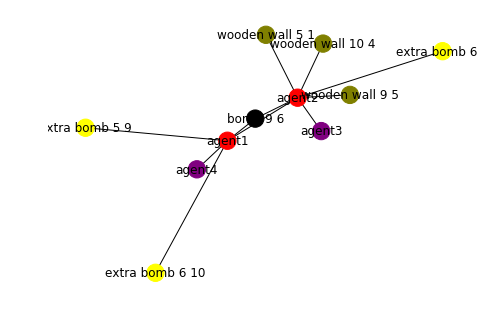

purple agent1
purple agent2
red agent3
red agent4
olive wooden wall 1 5
olive wooden wall 2 4
olive wooden wall 4 2
olive wooden wall 5 1
olive wooden wall 5 10
black bomb 1 6
black bomb 5 9
black bomb 6 10
blue can kick Power-Up 4 1
blue can kick Power-Up 4 9


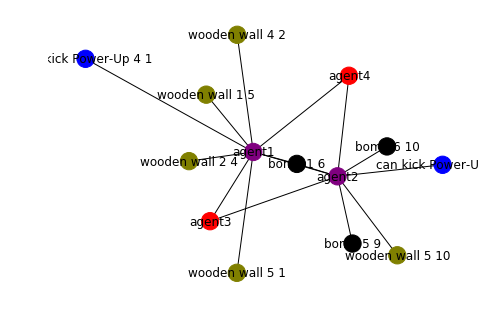

red agent1
red agent2
purple agent3
olive wooden wall 4 6
olive wooden wall 5 10
olive wooden wall 6 4
olive wooden wall 10 5
black bomb 1 6
black bomb 5 9
black bomb 6 10
yellow extra bomb 10 6
blue can kick Power-Up 4 9
blue can kick Power-Up 9 4


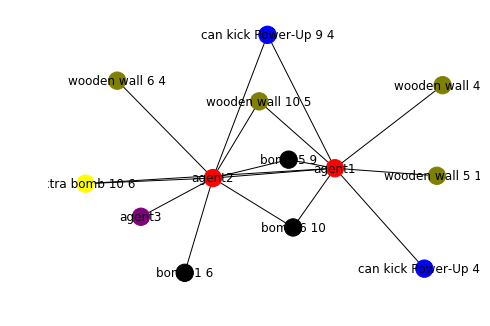

purple agent1
purple agent2
red agent3
red agent4
olive wooden wall 2 4
olive wooden wall 4 2
olive wooden wall 4 6
olive wooden wall 4 10
black bomb 1 4
black bomb 10 6
yellow extra bomb 5 1
blue can kick Power-Up 4 1
blue can kick Power-Up 10 4


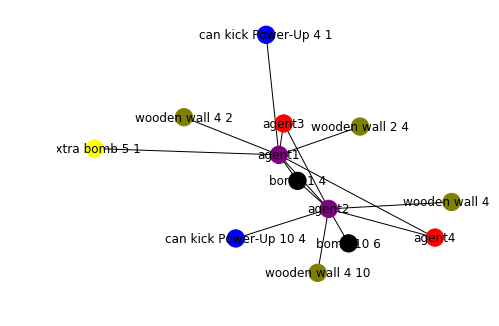

red agent1
red agent2
purple agent3
purple agent4
olive wooden wall 4 2
olive wooden wall 4 3
olive wooden wall 5 4
olive wooden wall 6 4
olive wooden wall 10 5
black bomb 1 4
black bomb 10 6
yellow extra bomb 5 1
blue can kick Power-Up 4 1
blue can kick Power-Up 10 4


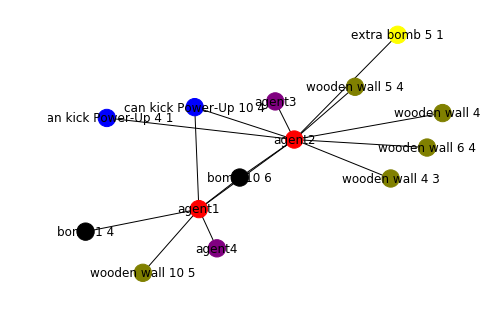

In [150]:
draw_graph(0, 1, 3) # first game first team
draw_graph(0, 3, 5) # first game second team
draw_graph(6, 7, 9) # second game first team
draw_graph(6, 9, 11) # second game second team
draw_graph(12, 13, 15) # third game first team
draw_graph(12, 15, 17) # third game second team
draw_graph(18, 19, 21) # 4 game second team
draw_graph(18, 21, 23) # 4 game second team
draw_graph(24, 25, 27) # 5 game second team
draw_graph(24, 27, 29) # 5 game second team